# Netflix Original Films - EDA

This dataset is from Kaggle and consists of:
- Title
- Genre
- Premiere date
- Runtime
- IMDB scores
- Languages

In this project, these questions will be answered:
1. In which language were the long-running films created according to the dataset? Make a visualization.
2. Find and visualize the IMDB values of the movies shot in the 'Documentary' genre between January 2019 and June 2020.
3. Which genre has the highest IMDB rating among movies shot in English?
4. What is the average 'runtime' of movies shot in 'Hindi'?
5. How many categories does the genre column have and how many films for each genre? Visualize it.
6. Find the 3 most used languages in the movies in the data set.
7. Top 10 Movies With IMDB Ratings
8. What is the correlation between IMDB score and 'Runtime'? Examine and visualize.
9. Top 10 Genre by IMDB Score
10. What are the top 10 movies with the highest 'runtime'? Visualize it.
11. In which year was the most movies released? Visualize it.
12. Which language movies have the lowest average IMDB rating? Visualize it.
13. Which year has the greatest total runtime?

In [3]:
# Importing packages/libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

# Import the data
df = pd.read_csv(r"NetflixOriginals.csv", encoding = "ISO-8859-1")
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


In [4]:
df.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


In [24]:
# Analyzing to see if there are any null value
df.isnull().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

In [210]:
# Adjusting the date so that it is easier for questions regarding certain months/years
df['Premiere'] = pd.to_datetime(df['Premiere'], format="%B %d, %Y", errors="coerce")

# Creating the 'year' and 'month' columns
df['year'] = df['Premiere'].dt.year.astype('Int64')
df['month'] = df['Premiere'].dt.month_name()

df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,year,month
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,2019,August
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,2020,August
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,2019,December
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,2018,January
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,2020,October


#### 1. In which language were the long-running films created according to the dataset? Make a visualization.

In [5]:
runtime_df = df[['Runtime', 'Title', 'Language']].copy()
runtime_df['Runtime'] = pd.to_numeric(runtime_df['Runtime'], errors='coerce')
runtime_df = runtime_df.sort_values(by='Runtime', ascending=False)
runtime_df.head(1)

,Runtime,Title,Language
561,209,The Irishman,English


([], [])

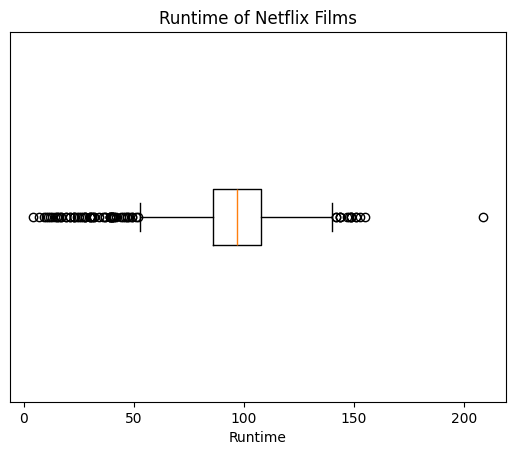

In [227]:
run_box = plt.boxplot(runtime_df['Runtime'], vert = False)
plt.title('Runtime of Netflix Films')
plt.xlabel("Runtime")
plt.yticks([])

#### 2. Find and visualize the IMDB values of the movies shot in the 'Documentary' genre between January 2019 and June 2020.

In [109]:
docu_df = df[ ((df['Genre'] == 'Documentary') &
              ((df['year'] == 2019) |
               (df['year'] == 2020) & ((df['month'] == 'January') |
               (df['month'] == 'February') | (df['month'] == 'March') | (df['month'] == 'April') | (df['month'] == 'May') |
               (df['month'] == 'June'))))].copy()

docu_df['MonthYear'] = docu_df['Premiere'].dt.strftime('%B %Y')
docu_df.sort_values(by = 'Premiere', inplace = True)
docu_df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,year,month,weekday,MonthYear
510,ReMastered: Massacre at the Stadium,Documentary,2019-01-11,64,7.3,English/Spanish,2019,January,Friday,January 2019
482,Fyre: The Greatest Party That Never Happened,Documentary,2019-01-18,97,7.2,English,2019,January,Friday,January 2019
511,ReMastered: The Two Killings of Sam Cooke,Documentary,2019-02-08,64,7.3,English,2019,February,Friday,February 2019
524,Period. End of Sentence.,Documentary,2019-02-12,26,7.4,English/Hindi,2019,February,Tuesday,February 2019
324,Antoine Griezmann: The Making of a Legend,Documentary,2019-03-21,60,6.5,French,2019,March,Thursday,March 2019


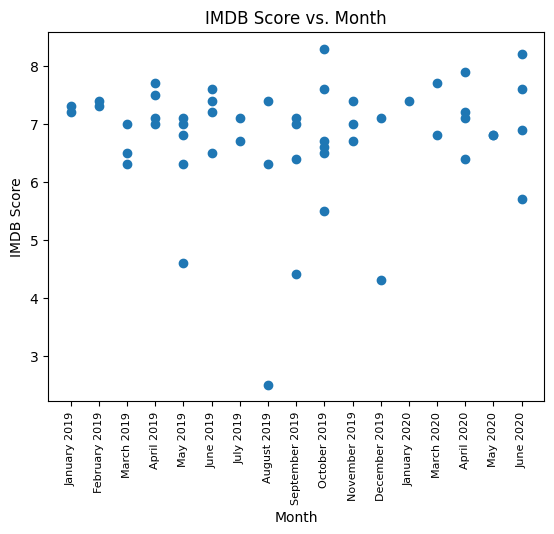

In [250]:
plt.scatter(docu_df['MonthYear'], docu_df['IMDB Score'])
plt.xlabel('Month')
plt.ylabel('IMDB Score')
plt.title('IMDB Score vs. Month')
plt.xticks(rotation = 90, size = 8)
plt.show()

#### 3. Which genre has the highest rating IMDB rating among movies shot in English?

In [157]:
imdb_english = df[df['Language'] == 'English']
imdb = imdb_english[['Genre', 'Title', 'IMDB Score']].sort_values(by = 'IMDB Score', ascending = False)
imdb.head(1)

,Genre,Title,IMDB Score
583,Documentary,David Attenborough: A Life on Our Planet,9.0


#### 4. What is the average runtime of movies shot in Hindi?

In [308]:
hindi_runtime_df = df[(df['Language'] == 'Hindi')]
hindi_runtime = hindi_runtime_df.Runtime.mean()
print("The average runtime of movies in Hindi is", hindi_runtime.round(2), "minutes")

The average runtime of movies in Hindi is 115.79 minutes


#### 5. How many categories does the genre column have and how many films for each genre? Visualize it.

In [311]:
num_genres = df['Genre'].value_counts().reset_index()
num_genres.columns = ['Genre', 'Count']
print("There are", len(num_genres), "different genres.")

There are 115 different genres.


In [315]:
num_genres

,Genre,Count
0,Documentary,159
1,Drama,77
2,Comedy,49
3,Romantic comedy,39
4,Thriller,33
...,...,...
110,Action-adventure,1
111,Animation / Science Fiction,1
112,Anthology/Dark comedy,1
113,Musical / Short,1


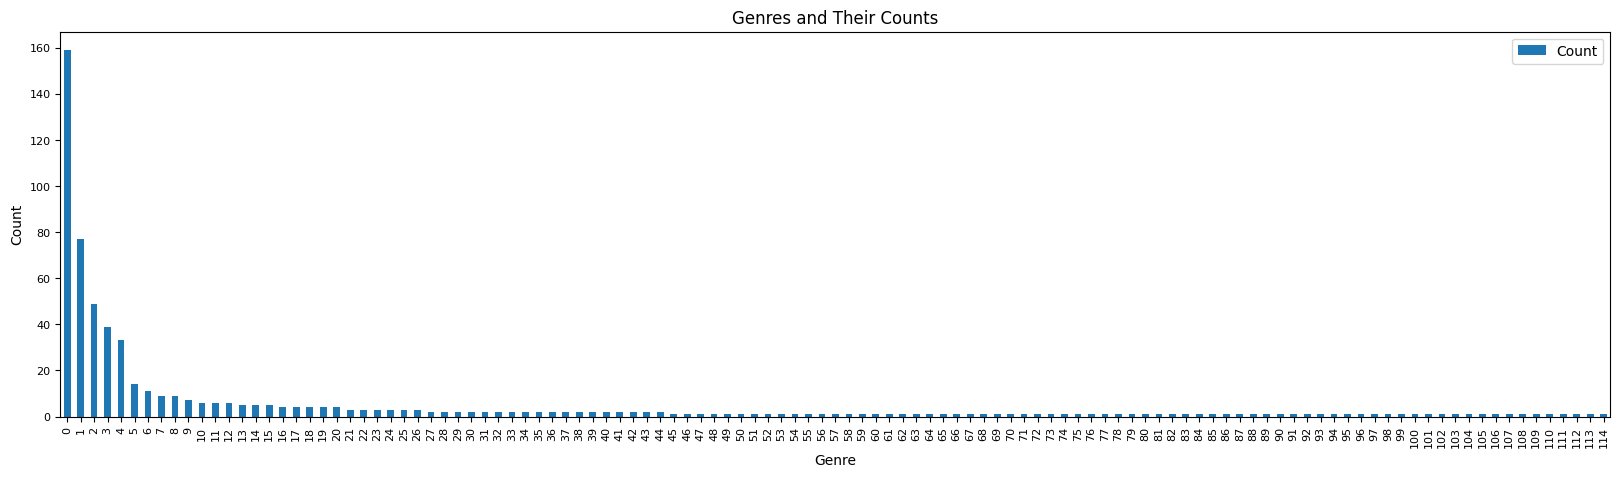

In [314]:
genres_visual = num_genres.plot(kind = 'bar',
                                title = "Genres and Their Counts",
                                xlabel = "Genre",
                                ylabel = "Count",
                                rot = 90,
                                fontsize = 8,
                                figsize = (20, 5))

#### 6. Find the 3 most used languages in the movies in the data set.


In [279]:
top_languages = df['Language'].value_counts().nlargest(3).reset_index()
top_languages.columns = ['Language', 'Count']
top_languages

,Language,Count
0,English,401
1,Hindi,33
2,Spanish,31


#### 7. Top 10 movies with IMDB Ratings

In [318]:
top_ten_df = df.sort_values(by = ['IMDB Score'], ascending = False).head(10)
top_ten_df

,Title,Genre,Premiere,Runtime,IMDB Score,Language
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
578,Ben Platt: Live from Radio City Music Hall,Concert Film,"May 20, 2020",85,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
576,Cuba and the Cameraman,Documentary,"November 24, 2017",114,8.3,English
577,Dancing with the Birds,Documentary,"October 23, 2019",51,8.3,English
575,The Three Deaths of Marisela Escobedo,Documentary,"October 14, 2020",109,8.2,Spanish
574,Seaspiracy,Documentary,"March 24, 2021",89,8.2,English


<Axes: title={'center': 'Top Ten IMDB Scores'}, xlabel='Movie Title'>

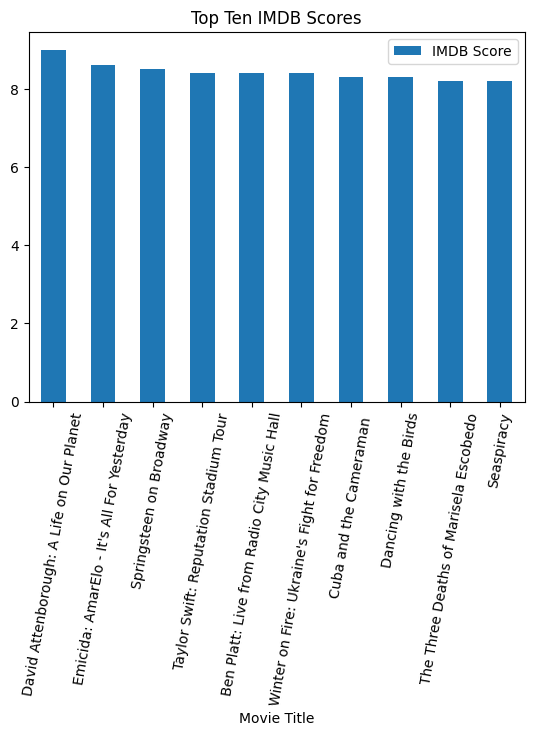

In [325]:
top_ten_df.plot(kind = 'bar',
                x = 'Title',
                y = 'IMDB Score',
                title = 'Top Ten IMDB Scores',
                xlabel = 'Movie Title',
                rot = 80)

#### 8. What is the correlation between IMDB score and Runtime? Examine and visualize.

In [146]:
df[['IMDB Score', 'Runtime']].corr()

,IMDB Score,Runtime
IMDB Score,1.000000,-0.040896
Runtime,-0.040896,1.000000


Text(0.15, 0.7, 'y = -1.16x + 100.85\nR$^2$ = 0.0017')

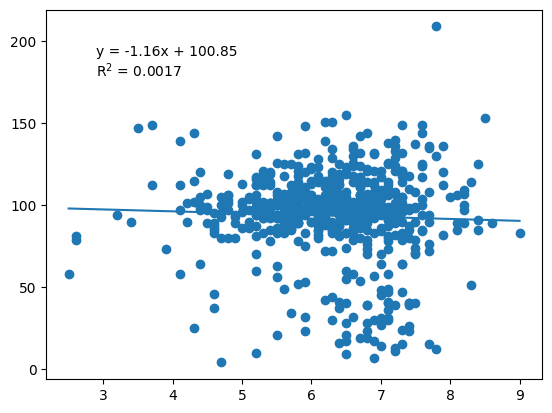

In [343]:
plt.scatter(df['IMDB Score'], df['Runtime'])
slope, intercept, rvalue, pvalue, stderr = stats.linregress(df['IMDB Score'], df['Runtime'])
plt.plot(df['IMDB Score'], slope * df['IMDB Score'] + intercept)
plt.annotate("y = %.2fx + %.2f\n"
             "R$^2$ = %.4f" % (slope, intercept, rvalue**2), xy = (0.15, 0.7), xycoords = 'figure fraction')

#### 9. Top ten genres by IMDB score

In [281]:
ten_genres = df.groupby('Genre')['IMDB Score'].mean().sort_values(ascending = False)
ten_genres = ten_genres.round(2)
top_genres = ten_genres.head(10).reset_index()
top_genres.columns = ['Genre', 'Avg IMDB Score']
top_genres

,Genre,Avg IMDB Score
0,Animation/Christmas/Comedy/Adventure,8.20
1,Musical / Short,7.70
2,Concert Film,7.63
3,Anthology/Dark comedy,7.60
4,Animation / Science Fiction,7.50
5,Making-of,7.45
6,Action-adventure,7.30
7,Drama-Comedy,7.20
8,Historical drama,7.20
9,Coming-of-age comedy-drama,7.20


#### 10. What are the top 10 movies with the highest runtime? Visualize it.

In [293]:
top_runtime = df.groupby(['Title']).mean(['Runtime']).sort_values(by = ['Runtime'], ascending = False)
top_runtime = top_runtime.head(10).reset_index()
top_runtime.columns = ['Title', 'Runtime', 'IMDB Score', 'Year']
top_runtime

,Title,Runtime,IMDB Score,Year
0,The Irishman,209.0,7.8,2019.0
1,Da 5 Bloods,155.0,6.5,2020.0
2,Springsteen on Broadway,153.0,8.5,2018.0
3,The Forest of Love,151.0,6.3,2019.0
4,Citation,151.0,6.2,2020.0
5,The Last Days of American Crime,149.0,3.7,2020.0
6,Ludo,149.0,7.6,2020.0
7,Raat Akeli Hai,149.0,7.3,2020.0
8,Army of the Dead,148.0,5.9,2021.0
9,Drive,147.0,3.5,2019.0


<Axes: title={'center': 'Top 10 Runtimes'}, xlabel='Movie', ylabel='Runtime'>

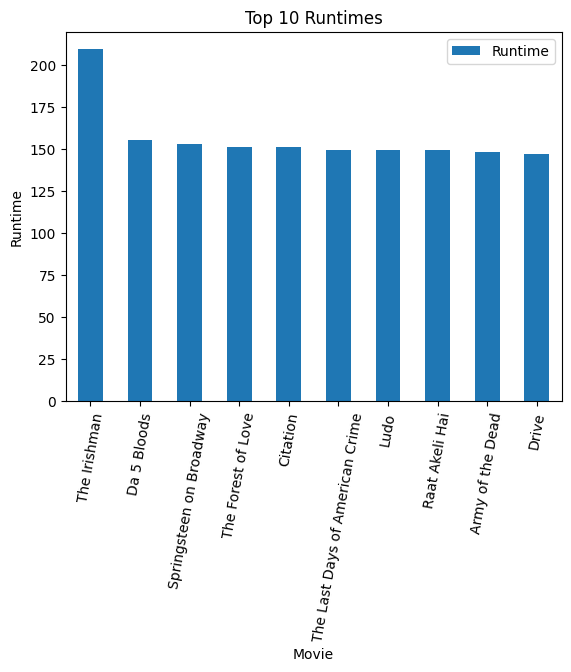

In [301]:
top_runtime.plot(kind = 'bar',
                 x = 'Title',
                 y = 'Runtime',
                 title = 'Top 10 Runtimes',
                 xlabel = 'Movie',
                 ylabel = 'Runtime',
                 rot = 80)

#### 11. In which year was the most movies released? Visualize it.

<Axes: xlabel='year'>

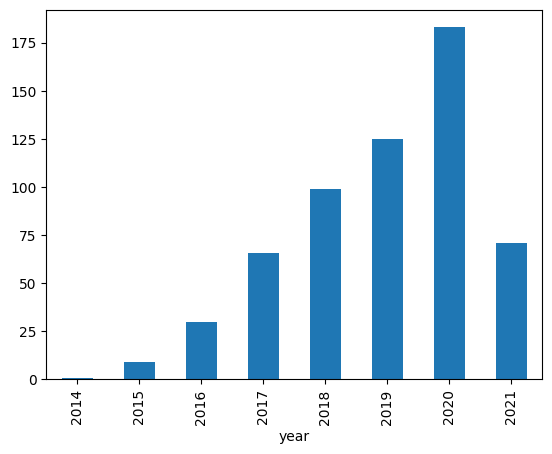

In [193]:
most_year = df['year'].value_counts().sort_index()

most_year.plot(kind = 'bar', x = most_year.index, y = most_year.values)

#### 12. Which language movies have the lowest average IMDB rating? Visualize it.

In [302]:
low_lang = df.groupby(['Language'])['IMDB Score'].mean().sort_values()
low_lang = low_lang.round(2)
low_lang = low_lang.reset_index()
low_lang.columns = ['Language', 'Avg IMDB Score']
low_lang.head()

,Language,Avg IMDB Score
0,Malay,4.20
1,English/Japanese,4.40
2,Norwegian,5.10
3,Filipino,5.10
4,Polish,5.17


<Axes: title={'center': 'IMDB Score by Language'}, xlabel='Language', ylabel='IMDB Score'>

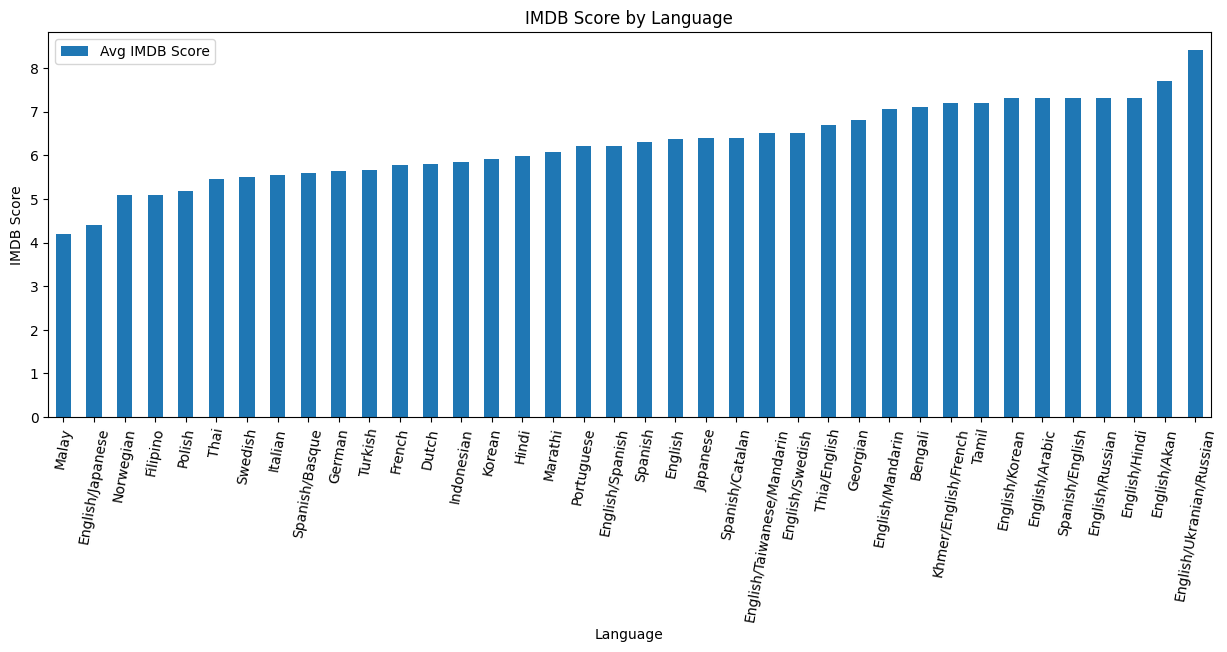

In [305]:
low_lang.plot(kind = 'bar',
              x = 'Language',
              y = 'Avg IMDB Score',
              title = 'IMDB Score by Language',
              xlabel = 'Language',
              ylabel = 'IMDB Score',
              figsize = (15, 5),
              rot = 80)

#### 13. Which year has the greatest total runtime?

In [306]:
total_runtime_year = df.groupby(['year'])['Runtime'].sum().sort_values(ascending = False).reset_index()
total_runtime_year.columns = ['Year', 'Total Runtime']
total_runtime_year

,Year,Total Runtime
0,2020,17384
1,2019,10835
2,2018,9405
3,2021,7214
4,2017,5924
5,2016,2610
6,2015,814
7,2014,81
